# Problem 3

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 

In [214]:
#read data
data=pd.read_excel("education.xlsx")

In [215]:
data.head()

,num,sup.help,sup.under,sup.safe,sup.conc,adv.comp,adv.acces,adv.comm,adv.qual,tut.prof,...,sat.glad,sat.expe,sat.over,loy.proud,loy.recom,loy.asha,loy.back,gender,scholarships,job
0,1,7,1,7,4,5,5,6,6,5,...,7,7,7,7,7,1,7,female,yes_scholship,no_job
1,2,7,1,6,4,6,6,5,6,6,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job
2,3,6,1,6,6,6,6,6,6,6,...,7,6,6,7,7,1,7,female,yes_scholship,no_job
3,4,1,7,3,1,1,2,1,1,3,...,1,1,1,1,1,7,1,male,no_scholship,no_job
4,5,6,5,5,7,7,6,7,7,7,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
num             181 non-null int64
sup.help        181 non-null int64
sup.under       181 non-null int64
sup.safe        181 non-null int64
sup.conc        181 non-null int64
adv.comp        181 non-null int64
adv.acces       181 non-null int64
adv.comm        181 non-null int64
adv.qual        181 non-null int64
tut.prof        181 non-null int64
tut.sched       181 non-null int64
tut.stud        181 non-null int64
tut.qual        181 non-null int64
val.devel       181 non-null int64
val.deci        181 non-null int64
val.meet        181 non-null int64
val.info        181 non-null int64
sat.glad        181 non-null int64
sat.expe        181 non-null int64
sat.over        181 non-null int64
loy.proud       181 non-null int64
loy.recom       181 non-null int64
loy.asha        181 non-null int64
loy.back        181 non-null int64
gender          181 non-null object
scholarships    181

In [217]:
data.isnull().any() #we should drop missing values, as there are variables that have N/As

num             False
sup.help        False
sup.under       False
sup.safe        False
sup.conc        False
adv.comp        False
adv.acces       False
adv.comm        False
adv.qual        False
tut.prof        False
tut.sched       False
tut.stud        False
tut.qual        False
val.devel       False
val.deci        False
val.meet        False
val.info        False
sat.glad        False
sat.expe        False
sat.over        False
loy.proud       False
loy.recom       False
loy.asha        False
loy.back        False
gender          False
scholarships    False
job             False
dtype: bool

In [218]:
#separate data into numeric and object subsets
data_numeric = data.select_dtypes(exclude="object")
data_object = data.select_dtypes(include="object")

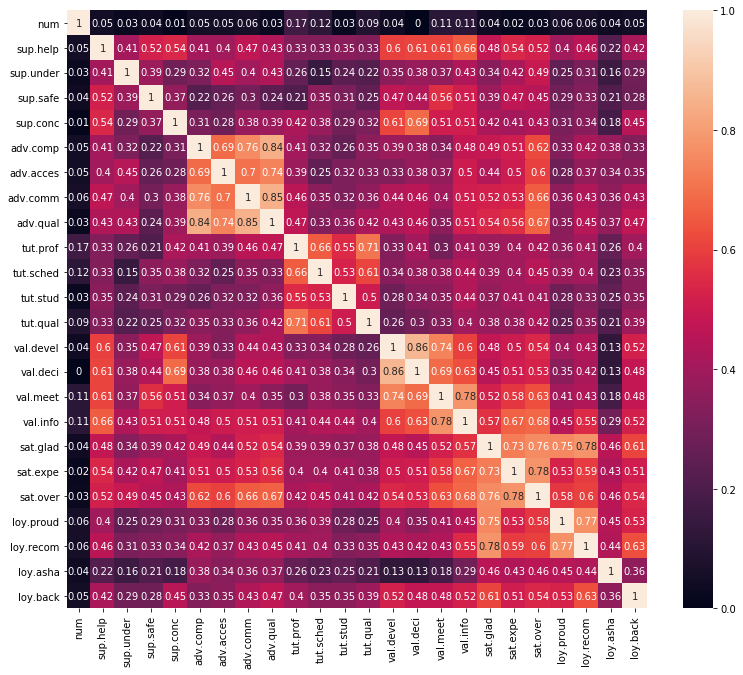

In [219]:
#we can see that there are many correlated variables
plt.figure(figsize=(13, 11)) #make the graph bigger
sns.heatmap(data_numeric.corr().abs().round(2), annot=True)
plt.show()

In [220]:
#check for 0 variance, as we can see there are no variables with 0 variance, so we will keep all numeric variables
data_numeric.var()==0

num          False
sup.help     False
sup.under    False
sup.safe     False
sup.conc     False
adv.comp     False
adv.acces    False
adv.comm     False
adv.qual     False
tut.prof     False
tut.sched    False
tut.stud     False
tut.qual     False
val.devel    False
val.deci     False
val.meet     False
val.info     False
sat.glad     False
sat.expe     False
sat.over     False
loy.proud    False
loy.recom    False
loy.asha     False
loy.back     False
dtype: bool

In [221]:
#check for unique values of categorical variables
for i in data_object.columns:
    print(data_object[i].unique())

['female' 'male']
['yes_scholship' 'no_scholship']
['no_job' 'yes_job']


In [222]:
#as sklearn doesn't automatically convert categories of object variables into dummy variables
data_dummy = pd.get_dummies(data_object,prefix=data_object.columns,drop_first=True)

In [223]:
data_dummy.head()

,gender_male,scholarships_yes_scholship,job_yes_job
0,0,1,0
1,0,1,1
2,0,1,0
3,1,0,0
4,0,1,1


In [224]:
#let's join the numeric and dummy variables back (by index)
data = data_numeric.join(data_dummy)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
num                           181 non-null int64
sup.help                      181 non-null int64
sup.under                     181 non-null int64
sup.safe                      181 non-null int64
sup.conc                      181 non-null int64
adv.comp                      181 non-null int64
adv.acces                     181 non-null int64
adv.comm                      181 non-null int64
adv.qual                      181 non-null int64
tut.prof                      181 non-null int64
tut.sched                     181 non-null int64
tut.stud                      181 non-null int64
tut.qual                      181 non-null int64
val.devel                     181 non-null int64
val.deci                      181 non-null int64
val.meet                      181 non-null int64
val.info                      181 non-null int64
sat.glad                      181 non-null int64
sat.expe     

In [226]:
Y=data[["sat.glad", "sat.expe", "sat.over"]]
X=scale(data.drop(columns=["sat.glad", "sat.expe", "sat.over"]))

In [227]:
# split 75% train and 25% test
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [228]:
#run pls model, we define the number of latent variables we want to keep in the model
pls = PLSRegression(24)
pls=pls.fit(x_train,y_train)

In [229]:
#let's use the model to do prediction for test data
pred=pls.predict(x_test)

In [230]:
#R-square
pls_r2=pls.score(x_test,y_test)
print(pls_r2)

0.3799993212319043


In [231]:
#this gives all coefs per all 24 X variables
coef=pd.DataFrame(pls.coef_)
coef.head()

,0,1,2
0,-0.092201,-0.010778,0.011695
1,-0.082083,-0.022470,-0.076199
2,-0.017806,-0.108201,-0.044764
3,0.044780,0.096085,0.034817
4,0.086909,0.083247,0.010079


In [232]:
#scores of latent variables
sc=pd.DataFrame(pls.x_scores_)
sc.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.857638,0.133764,0.853618,-0.100318,-1.185610,0.248376,0.063070,-1.108548,-0.755446,-0.356219,...,-0.517430,-0.369392,-0.552929,0.434869,0.184565,-0.293866,0.375193,0.097923,0.097535,-0.499810
1,2.415631,0.042520,-0.115469,-1.361089,-0.093698,0.744205,-1.260321,-0.347833,-0.637110,-0.469920,...,0.337248,0.639794,0.622637,-0.225900,0.401094,0.192055,0.071871,-0.041822,0.361475,-0.076013
2,2.945618,-0.957652,0.682871,-0.474348,1.006220,-0.716889,-0.076299,0.151221,0.293680,0.349724,...,-0.365023,-0.159816,-0.085023,0.545702,-0.558818,0.008628,0.044607,-0.350516,-0.292360,-0.052759
3,-7.859322,-1.977142,-0.105344,0.851490,-0.547091,0.052130,-0.211254,0.090682,-0.282570,0.690123,...,0.955525,-0.208785,0.136365,-0.069277,-0.124130,-0.150283,-0.241268,-0.252921,-0.115290,-0.169349
4,-1.926817,1.610129,0.058334,-1.839356,-0.827321,-1.215046,1.002554,1.222161,-0.252264,-0.754077,...,-0.159072,0.333567,0.105840,0.761977,1.131836,-0.099718,0.161990,-0.410147,-0.046132,0.679442
5,-2.733119,1.307467,1.299109,-1.056002,0.360008,0.083702,0.254735,-0.800398,-1.484346,0.680573,...,-0.136457,-0.148761,-0.646369,1.319281,1.127544,0.216794,0.557221,0.691709,-0.602364,-0.185158
6,1.800679,0.058056,0.641305,1.393090,0.148011,0.536589,0.371035,-0.368013,0.300851,-0.887589,...,0.555000,0.089450,-0.034847,-0.375096,0.394807,0.204444,0.575995,0.180379,-0.139662,-0.033195
7,1.104821,-0.036885,1.469941,-0.487139,-0.534424,-1.005593,1.848469,-0.016477,-0.368723,0.451757,...,-0.700830,-0.155399,-0.204311,0.111252,0.631853,-0.467509,0.216080,-0.204550,-0.088120,0.350936
8,-2.846298,-0.021633,0.315441,-0.171007,-0.229715,1.008104,-0.846424,0.953826,-0.516247,-1.104426,...,-0.434973,-0.309764,0.605999,-0.073820,0.287991,-0.295507,-0.141347,0.030827,0.454266,-0.035035
9,0.831954,-0.035521,-0.669536,1.911785,-1.591215,-0.272532,0.138596,0.456388,0.510611,0.680563,...,0.060515,-0.626952,0.219265,0.664592,0.559587,0.283858,0.194158,0.272972,-0.801689,-0.168239


we want to calculate how much of the variance of all X variables is explained by each latent variable

In [233]:
#first we need to calculate the variance for each latent variable created
var_xcores=np.var(pls.x_scores_,axis=0)
print(var_xcores)

[9.2525381  1.23121137 1.34089609 1.08137006 0.79987243 0.85824961
 0.68189272 0.5069814  0.55528937 0.55930164 0.43866701 0.43160934
 0.26798586 0.32060981 0.40920885 0.34144167 0.336986   0.17244706
 0.35822698 0.16683577 0.27406973 0.19233022 0.28676052 0.26297047]


In [234]:
#second, lets calculate total variance of all X variables
total_var=np.sum(np.var(x_train,axis=0))
print(total_var)

25.07465087249158


In [235]:
pd.DataFrame(x_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 24 columns):
0     135 non-null float64
1     135 non-null float64
2     135 non-null float64
3     135 non-null float64
4     135 non-null float64
5     135 non-null float64
6     135 non-null float64
7     135 non-null float64
8     135 non-null float64
9     135 non-null float64
10    135 non-null float64
11    135 non-null float64
12    135 non-null float64
13    135 non-null float64
14    135 non-null float64
15    135 non-null float64
16    135 non-null float64
17    135 non-null float64
18    135 non-null float64
19    135 non-null float64
20    135 non-null float64
21    135 non-null float64
22    135 non-null float64
23    135 non-null float64
dtypes: float64(24)
memory usage: 25.4 KB


In [236]:
#calculate the proportioan of total X variance explained by each latent variable
X_Variance=pd.DataFrame((var_xcores/total_var).round(3), columns={"X_Variance"}).reset_index()

In [237]:
#let's keep X_variance i=and cummulative X_Variance as dataframe
X_Variance = X_Variance.rename(columns={'index': 'Latent_Factors'})
X_Variance['Cummulative_X_Variance'] = X_Variance['X_Variance'].cumsum().round(3) #calculates cummulative variance
print(X_Variance)

    Latent_Factors  X_Variance  Cummulative_X_Variance
0                0       0.369                   0.369
1                1       0.049                   0.418
2                2       0.053                   0.471
3                3       0.043                   0.514
4                4       0.032                   0.546
5                5       0.034                   0.580
6                6       0.027                   0.607
7                7       0.020                   0.627
8                8       0.022                   0.649
9                9       0.022                   0.671
10              10       0.017                   0.688
11              11       0.017                   0.705
12              12       0.011                   0.716
13              13       0.013                   0.729
14              14       0.016                   0.745
15              15       0.014                   0.759
16              16       0.013                   0.772
17        

The first factor explains 36.9% of the variance in the predictors, The second factor explains 04.9% of the variance in the predictors
Together, the first 20 factors explain 80.0% of the variance in the predictors.
Cummulative variances of all X variances are not explained by all latent variances by 100%, because PLS shows us not only the covariance between X-es, but also the maximal covariance between X-es and Y-s. PlS has stronger predictions as when creating scores of X takes into account the correlation with Y to be as higher as possible.

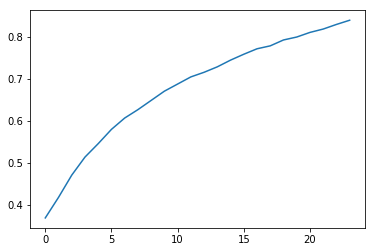

In [238]:
#we want to see visually from which latent variable the variance changes very slightly
plt.plot(X_Variance.Latent_Factors,X_Variance.Cummulative_X_Variance)
plt.show()

Same explanation of the table we can see from the graph